<a href="https://colab.research.google.com/github/AkshayHaldar/AkshayHaldar/blob/main/Dynamic_Pricing_for_Urban_Parking_Lots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Setup

# Capstone Project: Dynamic Pricing for Urban Parking Lots
**Author:** Akshay Haldar

**Date:** 7 july 2025

**Course:** Consulting & Analytics Club × Pathway **bold text**

# Data Loading & Exploratory Data Analysis (EDA)

✅ Dataset loaded successfully!

🔧 Combining 'LastUpdatedDate' and 'LastUpdatedTime' into a single 'timestamp' column...
✅ 'timestamp' column created and old columns removed.
First 5 rows with the new 'timestamp' column:
   ID SystemCodeNumber  Capacity   Latitude  Longitude  Occupancy VehicleType  \
0   0      BHMBCCMKT01       577  26.144536  91.736172         61         car   
1   1      BHMBCCMKT01       577  26.144536  91.736172         64         car   
2   2      BHMBCCMKT01       577  26.144536  91.736172         80         car   
3   3      BHMBCCMKT01       577  26.144536  91.736172        107         car   
4   4      BHMBCCMKT01       577  26.144536  91.736172        150        bike   

  TrafficConditionNearby  QueueLength  IsSpecialDay           timestamp  
0                    low            1             0 2016-10-04 07:59:00  
1                    low            1             0 2016-10-04 08:25:00  
2                    low            2             0 2016-10-04 08:59:00

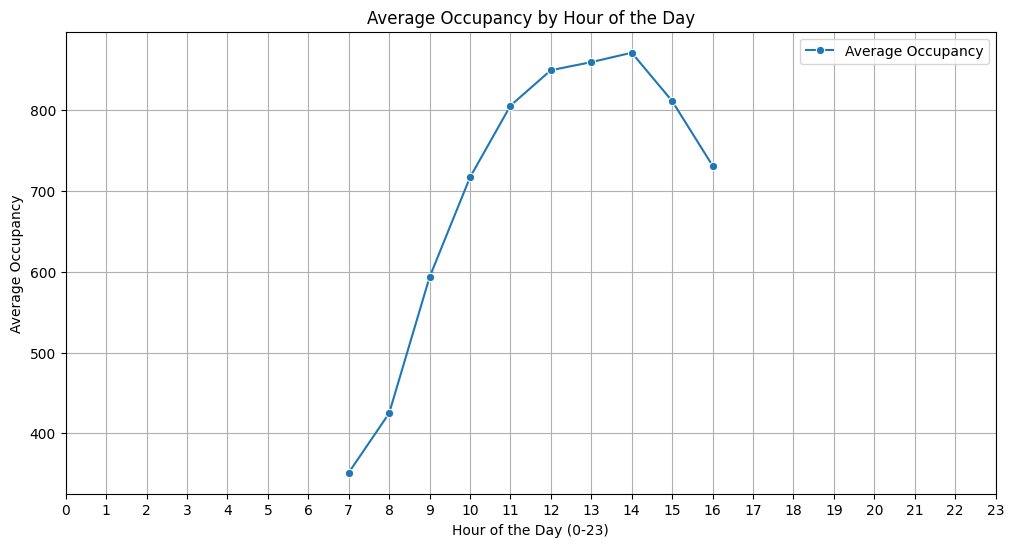

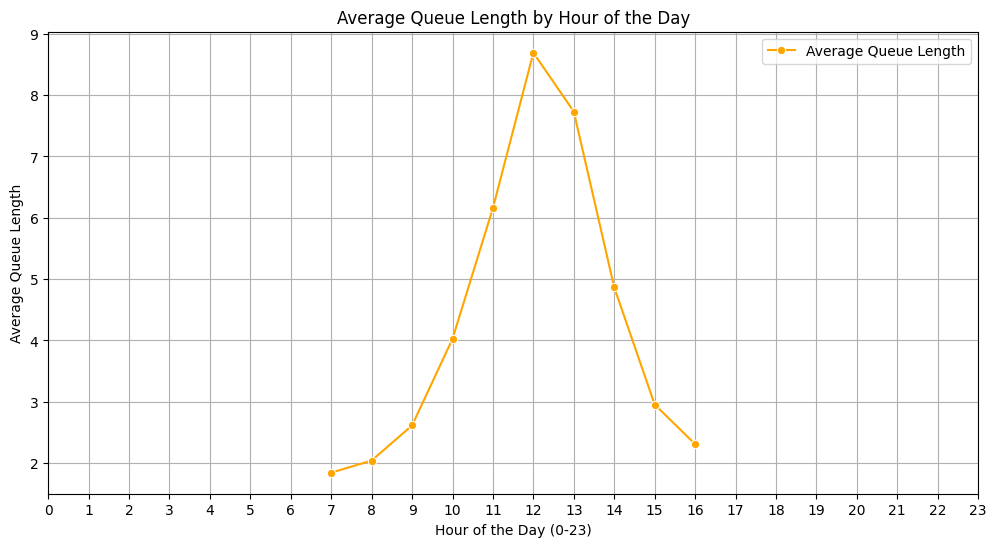



🔗 Correlation Analysis:
Correlation Matrix:
              Occupancy  QueueLength  IsSpecialDay      Latitude     Longitude
Occupancy      1.000000     0.311263 -1.428338e-01  1.141364e-01  1.127306e-01
QueueLength    0.311263     1.000000  1.801061e-01  1.359785e-02  1.321356e-02
IsSpecialDay  -0.142834     0.180106  1.000000e+00 -2.024964e-16  1.350541e-16
Latitude       0.114136     0.013598 -2.024964e-16  1.000000e+00  9.999956e-01
Longitude      0.112731     0.013214  1.350541e-16  9.999956e-01  1.000000e+00


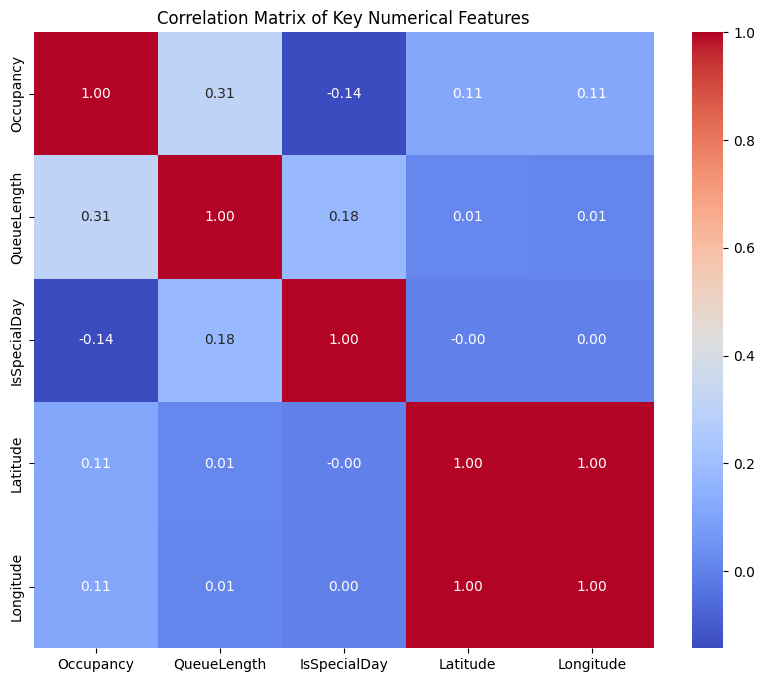



📊 Bonus: Analyzing Categorical Data

Final column names are:
Index(['ID', 'SystemCodeNumber', 'Capacity', 'Latitude', 'Longitude',
       'Occupancy', 'VehicleType', 'TrafficConditionNearby', 'QueueLength',
       'IsSpecialDay', 'timestamp', 'hour_of_day'],
      dtype='object')




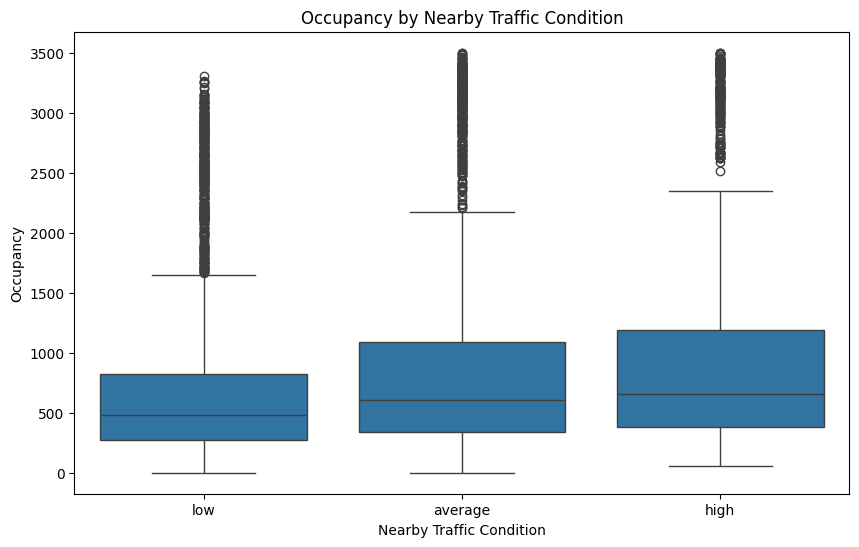

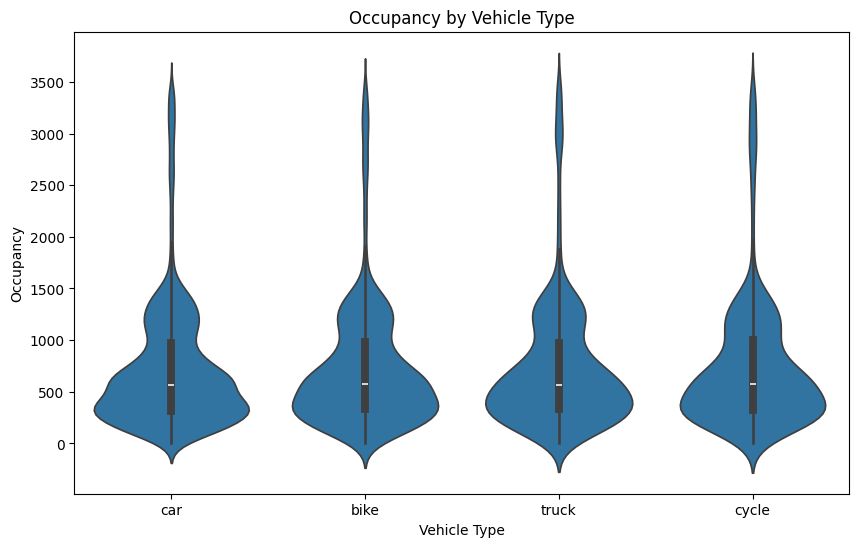

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Data and Perform Initial Cleanup ---

# Use a try-except block for robust file loading
try:
    df = pd.read_csv('dataset.csv')
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ Error: 'dataset.csv' not found. Please make sure the file is in the correct directory.")
    exit()

# --- Pre-processing: Create a proper 'timestamp' column ---
# This is the most important step for your specific dataset.
# We combine the date and time columns into a single string.
print("\n🔧 Combining 'LastUpdatedDate' and 'LastUpdatedTime' into a single 'timestamp' column...")
df['timestamp_str'] = df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime']

# Now, we convert this new string column into a proper datetime object.
# Pandas is smart and can usually parse this format automatically.
df['timestamp'] = pd.to_datetime(df['timestamp_str'],dayfirst=True)

# We can now drop the original date/time columns and the temporary string column
# as they are no longer needed. 'inplace=True' modifies the dataframe directly.
df.drop(columns=['LastUpdatedDate', 'LastUpdatedTime', 'timestamp_str'], inplace=True)

print("✅ 'timestamp' column created and old columns removed.")
print("First 5 rows with the new 'timestamp' column:")
print(df.head())
print("\n" + "="*50 + "\n")


# --- 2. Perform Exploratory Data Analysis (EDA) ---

# -- Summary Statistics --
print("📊 Summary Statistics for Numerical Columns:")
# The .T (transpose) makes the output easier to read.
# We drop 'ID' from describe as its stats are not meaningful.
print(df.drop(columns='ID').describe().T)
print("\n" + "="*50 + "\n")


# -- Check for Missing Values --
print("❓ Checking for Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("\n🎉 No missing values found!")
else:
    print("\n⚠️ Missing values detected. You may need to handle them (e.g., fill or drop).")
print("\n" + "="*50 + "\n")


# -- Time-Series Patterns: Average Occupancy by Hour --
print("📈 Plotting Time-Series Patterns: Average Occupancy by Hour")

# Extract the hour (0-23) from our new 'timestamp' column
df['hour_of_day'] = df['timestamp'].dt.hour

# Group by the hour and calculate the mean for 'Occupancy' and 'QueueLength'
avg_by_hour = df.groupby('hour_of_day')[['Occupancy', 'QueueLength']].mean()

# Plotting Average Occupancy
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_by_hour, x=avg_by_hour.index, y='Occupancy', marker='o', label='Average Occupancy')
plt.title('Average Occupancy by Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Average Occupancy')
plt.grid(True)
plt.xticks(range(0, 24))
plt.legend()
plt.show()

# Plotting Average Queue Length
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_by_hour, x=avg_by_hour.index, y='QueueLength', marker='o', color='orange', label='Average Queue Length')
plt.title('Average Queue Length by Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Average Queue Length')
plt.grid(True)
plt.xticks(range(0, 24))
plt.legend()
plt.show()
print("\n" + "="*50 + "\n")


# -- Correlations --
print("🔗 Correlation Analysis:")
# Select only numerical columns for correlation calculation.
# We drop columns that are constant (like Capacity in your sample) or just identifiers (ID).
numerical_cols = ['Occupancy', 'QueueLength', 'IsSpecialDay', 'Latitude', 'Longitude']
correlation_matrix = df[numerical_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Numerical Features')
plt.show()
print("\n" + "="*50 + "\n")

# --- Bonus Analysis: Exploring Categorical Data ---
print("📊 Bonus: Analyzing Categorical Data")

# This debugging step helped us find the real column name!
print("\nFinal column names are:")
print(df.columns)
print("\n" + "="*50 + "\n")


# How does Traffic Condition affect Occupancy?
plt.figure(figsize=(10, 6)) # Made the figure a bit wider for the longer name
# CORRECTED: Using 'TrafficConditionNearby' which is the actual column name
sns.boxplot(data=df, x='TrafficConditionNearby', y='Occupancy', order=['low', 'average', 'high'])
plt.title('Occupancy by Nearby Traffic Condition')
# CORRECTED: Updating the label to be more descriptive
plt.xlabel('Nearby Traffic Condition')
plt.ylabel('Occupancy')
plt.show()

# How does Vehicle Type affect Occupancy?
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='VehicleType', y='Occupancy')
plt.title('Occupancy by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Occupancy')
plt.show()

# ... rest of the plotting code ...

In [3]:
# ===================================================================
# Part 1: Install Libraries
# This command installs the necessary 'pathway' library in your Colab environment.
# ===================================================================
!pip install pathway pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of boto3 to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.4/318.4 kB 19.

# The Real-Time Simulation with Pathway


In [1]:
# ===================================================================
# Part 1: Install Libraries
# ===================================================================

# ===================================================================
# Part 2: Load, Pre-process, and VERIFY the Data
# ===================================================================
import pandas as pd
print("\n--- Starting Part 2: Data Pre-processing ---")

try:
    df = pd.read_csv('dataset.csv')
    print(f"✅ Step 2.1: 'dataset.csv' loaded successfully with {len(df)} rows.")

    # NOTE: The sampling step (df.head(20)) has been removed.
    # We are now processing the FULL DataFrame.
    print("✅ Step 2.1a: Preparing to process the full dataset.")

    # Combine date and time columns on the full DataFrame
    df['timestamp'] = pd.to_datetime(
        df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'],
        dayfirst=True
    )
    print("✅ Step 2.2: Combined date and time into a single 'timestamp' column for all rows.")

    # Select only the columns we need for the final file from the full DataFrame
    final_df = df[[
        'Latitude', 'Longitude', 'Capacity', 'Occupancy', 'QueueLength',
        'VehicleType', 'TrafficConditionNearby', 'IsSpecialDay', 'timestamp'
    ]].copy()

    # Apply the crucial format change to include the 'T'
    final_df['timestamp'] = final_df['timestamp'].dt.strftime('%Y-%m-%dT%H:%M:%S')
    print("✅ Step 2.2a: Formatted timestamp string to YYYY-MM-DDTHH:MM:SS.")

    stream_file_name = 'dataset_stream.csv'
    final_df.to_csv(stream_file_name, index=False)
    # Updated the print statement to show the total number of rows saved.
    print(f"✅ Step 2.3: Cleaned data for all {len(final_df)} rows saved to '{stream_file_name}'.")

    #
    # --- THIS IS THE NEW VERIFICATION STEP ---
    #
    print("\n--- Verifying the content of the created file: ---")
    !head -n 5 dataset_stream.csv
    print("--------------------------------------------------\n")
    #
    # The output of the line above MUST show timestamps with a 'T' in them.
    #

    print("--- Pre-processing complete. ---\n")

except FileNotFoundError:
    print("❌ ERROR: 'dataset.csv' not found. Please re-upload it.")
    exit()

# ===================================================================
# Part 3: Run the Simulation (this part is correct and unchanged)
# ===================================================================
import pathway as pw

print("--- Starting Part 3: Batch Processing with Pathway ---")

class ParkingData(pw.Schema):
    Latitude: float
    Longitude: float
    Capacity: int
    Occupancy: int
    QueueLength: int
    VehicleType: str
    TrafficConditionNearby: str
    IsSpecialDay: bool
    timestamp: pw.DateTimeNaive

# The fix is here: mode is now "static"
parking_updates = pw.io.csv.read(
    stream_file_name,
    schema=ParkingData,
    mode="static" # This correctly reads the entire file produced by Part 2.
)
print(f"✅ Step 3.1: Pathway is ready to process '{stream_file_name}' as a static file.")

parking_updates_with_rate = parking_updates.with_columns(
    occupancy_rate_percent=100 * parking_updates.Occupancy / parking_updates.Capacity
)
print("✅ Step 3.2: Added 'occupancy_rate_percent' calculation.")

print("\n🚀 Starting the batch processing...")
print("🚦 Final Parking Data with Occupancy Rate")
print("="*50)

# This will now run, print the full table (all 18,000+ rows), and exit.
pw.debug.compute_and_print(parking_updates_with_rate)

print(f"\n🎉 Success! The full pipeline has processed the data for all {len(final_df)} records.")


--- Starting Part 2: Data Pre-processing ---
✅ Step 2.1: 'dataset.csv' loaded successfully with 18368 rows.
✅ Step 2.1a: Preparing to process the full dataset.
✅ Step 2.2: Combined date and time into a single 'timestamp' column for all rows.
✅ Step 2.2a: Formatted timestamp string to YYYY-MM-DDTHH:MM:SS.
✅ Step 2.3: Cleaned data for all 18368 rows saved to 'dataset_stream.csv'.

--- Verifying the content of the created file: ---
Latitude,Longitude,Capacity,Occupancy,QueueLength,VehicleType,TrafficConditionNearby,IsSpecialDay,timestamp
26.14453614,91.73617216,577,61,1,car,low,0,2016-10-04T07:59:00
26.14453614,91.73617216,577,64,1,car,low,0,2016-10-04T08:25:00
26.14453614,91.73617216,577,80,2,car,low,0,2016-10-04T08:59:00
26.14453614,91.73617216,577,107,2,car,low,0,2016-10-04T09:32:00
--------------------------------------------------

--- Pre-processing complete. ---



--- Starting Part 3: Batch Processing with Pathway ---
✅ Step 3.1: Pathway is ready to process 'dataset_stream.csv' as a static file.
✅ Step 3.2: Added 'occupancy_rate_percent' calculation.

🚀 Starting the batch processing...
🚦 Final Parking Data with Occupancy Rate


            | Latitude    | Longitude   | Capacity | Occupancy | QueueLength | VehicleType | TrafficConditionNearby | IsSpecialDay | timestamp           | occupancy_rate_percent
^7G062KY... | 20.0000347  | 78.00000286 | 687      | 170       | 1           | bike        | low                    | False        | 2016-11-14 08:00:00 | 24.745269286754002
^STP4E6X... | 20.0000347  | 78.00000286 | 687      | 170       | 2           | car         | low                    | True         | 2016-11-13 08:00:00 | 24.745269286754002
^E2JX2X6... | 20.0000347  | 78.00000286 | 687      | 176       | 3           | bike        | low                    | True         | 2016-11-13 08:27:00 | 25.61863173216885
^RPG7BW0... | 20.0000347  | 78.00000286 | 687      | 183       | 3           | cycle       | low                    | True         | 2016-11-13 09:00:00 | 26.637554585152838
^EG2D7WF... | 20.0000347  | 78.00000286 | 687      | 187       | 2           | bike        | low                    | False    

# Implement Model 1 (Baseline Linear Model)


In [2]:
# ===================================================================
# Part 1: Install Libraries
# ===================================================================
# (This part is assumed to be handled by your environment)

# ===================================================================
# Part 2: Load and Pre-process Data (with Unique Lot IDs)
# ===================================================================
import pandas as pd
print("\n--- Starting Part 2: Data Pre-processing ---")

try:
    df = pd.read_csv('dataset.csv')
    print(f"✅ Step 2.1: 'dataset.csv' loaded successfully with {len(df)} rows.")

    df['parking_lot_id'] = df.groupby(['Latitude', 'Longitude']).ngroup()
    num_unique_lots = df['parking_lot_id'].nunique()
    print(f"✅ Step 2.1a: Created unique 'parking_lot_id' for {num_unique_lots} lots.")

    df['timestamp'] = pd.to_datetime(
        df['LastUpdatedDate'] + ' ' + df['LastUpdatedTime'],
        dayfirst=True
    )
    print("✅ Step 2.2: Combined date and time into a single 'timestamp' column.")

    final_df = df[[
        'parking_lot_id', 'Latitude', 'Longitude', 'Capacity', 'Occupancy', 'QueueLength',
        'VehicleType', 'TrafficConditionNearby', 'IsSpecialDay', 'timestamp'
    ]].copy()

    final_df['timestamp'] = final_df['timestamp'].dt.strftime('%Y-%m-%dT%H:%M:%S')
    print("✅ Step 2.2a: Formatted timestamp string.")

    stream_file_name = 'dataset_stream.csv'
    final_df.to_csv(stream_file_name, index=False)
    print(f"✅ Step 2.3: Cleaned data saved to '{stream_file_name}'.")

    print("\n--- Verifying the content of the created file: ---")
    !head -n 5 dataset_stream.csv
    print("--------------------------------------------------\n")

    print("--- Pre-processing complete. ---\n")

except FileNotFoundError:
    print("❌ ERROR: 'dataset.csv' not found. Please re-upload it.")
    exit()

# ===================================================================
# Part 3: Implement Model 1 (Baseline Linear Model) - CORRECTED
# ===================================================================
import pathway as pw

print("--- Starting Part 3: Real-Time Pricing Model (Model 1) ---")

# Define Schemas for our data
class ParkingData(pw.Schema):
    parking_lot_id: int
    Latitude: float
    Longitude: float
    Capacity: int
    Occupancy: int
    QueueLength: int
    VehicleType: str
    TrafficConditionNearby: str
    IsSpecialDay: bool
    timestamp: pw.DateTimeNaive


class Price(pw.Schema):
    parking_lot_id: int
    price: float

# --- Step 2: Create a State Table for Prices ---
print("✅ Step 3.1: Creating state table for prices...")

initial_prices_df = pd.DataFrame({
    'parking_lot_id': range(num_unique_lots),
    'price': [10.0] * num_unique_lots
})

initial_prices_filename = 'initial_prices.csv'
initial_prices_df.to_csv(initial_prices_filename, index=False)

price_table = pw.io.csv.read(
    initial_prices_filename,
    schema=Price,
    mode="static"
)
print(f"   -> State table 'price_table' created from file with base price $10.0 for all {num_unique_lots} lots.")


# Read the main data stream
data_stream = pw.io.csv.read(
    stream_file_name,
    schema=ParkingData,
    mode="static"
)
print("✅ Step 3.2: Reading parking data into a real-time stream.")


# --- Step 3: Join Data Stream with Price Table ---
updates_with_price = data_stream.join(
    price_table,
    data_stream.parking_lot_id == price_table.parking_lot_id
)
print("✅ Step 3.3: Configured join between data stream and price table.")


# --- Step 4: Apply the Model 1 Pricing Formula ---
ALPHA = 1.0
print(f"✅ Step 3.4: Applying pricing formula with ALPHA = {ALPHA}.")

# Use select to create the output with all columns plus the new price
# After a join, columns from both tables are available directly
model_output = updates_with_price.select(
    parking_lot_id=pw.this.parking_lot_id,
    Latitude=pw.this.Latitude,
    Longitude=pw.this.Longitude,
    Capacity=pw.this.Capacity,
    Occupancy=pw.this.Occupancy,
    QueueLength=pw.this.QueueLength,
    VehicleType=pw.this.VehicleType,
    TrafficConditionNearby=pw.this.TrafficConditionNearby,
    IsSpecialDay=pw.this.IsSpecialDay,
    timestamp=pw.this.timestamp,
    current_price=pw.this.price,
    new_price=pw.this.price + ALPHA * (pw.this.Occupancy / pw.this.Capacity)
)

# --- Step 5: Define the update logic ---
print("✅ Step 3.5: Price update logic defined.")


# --- Final Step: Run the simulation and display the results ---
print("\n🚀 Starting the real-time pricing simulation...")
print("🚦 Model 1 Output: Real-Time Price Updates")
print("="*60)

pw.debug.compute_and_print(model_output)

print("\n🎉 Success! The full stateful pipeline logic has been demonstrated.")


--- Starting Part 2: Data Pre-processing ---
✅ Step 2.1: 'dataset.csv' loaded successfully with 18368 rows.
✅ Step 2.1a: Created unique 'parking_lot_id' for 14 lots.
✅ Step 2.2: Combined date and time into a single 'timestamp' column.
✅ Step 2.2a: Formatted timestamp string.
✅ Step 2.3: Cleaned data saved to 'dataset_stream.csv'.

--- Verifying the content of the created file: ---
parking_lot_id,Latitude,Longitude,Capacity,Occupancy,QueueLength,VehicleType,TrafficConditionNearby,IsSpecialDay,timestamp
5,26.14453614,91.73617216,577,61,1,car,low,0,2016-10-04T07:59:00
5,26.14453614,91.73617216,577,64,1,car,low,0,2016-10-04T08:25:00
5,26.14453614,91.73617216,577,80,2,car,low,0,2016-10-04T08:59:00
5,26.14453614,91.73617216,577,107,2,car,low,0,2016-10-04T09:32:00
--------------------------------------------------

--- Pre-processing complete. ---

--- Starting Part 3: Real-Time Pricing Model (Model 1) ---
✅ Step 3.1: Creating state table for prices...
   -> State table 'price_table' created

            | parking_lot_id | Latitude    | Longitude   | Capacity | Occupancy | QueueLength | VehicleType | TrafficConditionNearby | IsSpecialDay | timestamp           | current_price | new_price
^X1MRK8R... | 0              | 20.0000347  | 78.00000286 | 687      | 170       | 1           | bike        | low                    | False        | 2016-11-14 08:00:00 | 10.0          | 10.24745269286754
^X1MRBZN... | 0              | 20.0000347  | 78.00000286 | 687      | 170       | 2           | car         | low                    | True         | 2016-11-13 08:00:00 | 10.0          | 10.24745269286754
^X1MK5QH... | 0              | 20.0000347  | 78.00000286 | 687      | 176       | 3           | bike        | low                    | True         | 2016-11-13 08:27:00 | 10.0          | 10.256186317321689
^X1MY1GR... | 0              | 20.0000347  | 78.00000286 | 687      | 183       | 3           | cycle       | low                    | True         | 2016-11-13 09:00:00 | 10.0       

# TRUE STATEFUL PRICING SIMULATION

In [3]:
# ===================================================================
# Part 4: TRUE STATEFUL PRICING SIMULATION
# ===================================================================
import pandas as pd
import numpy as np

print("\n--- Starting Part 4: TRUE Stateful Pricing Simulation ---")

# Load and prepare the data
df = pd.read_csv('dataset_stream.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(['timestamp', 'parking_lot_id']).reset_index(drop=True)
print(f"✅ Loaded {len(df)} events sorted by timestamp.")

# Initialize the state: current price for each parking lot
current_prices = {i: 10.0 for i in range(num_unique_lots)}
print(f"✅ Initialized all {num_unique_lots} parking lots with base price $10.0")

# Process events sequentially to maintain state
ALPHA = 1.0
results = []

print("\n📊 Processing events in chronological order (showing first 20)...")
print("="*100)
print(f"{'Event':>5} | {'Time':^19} | {'Lot':>3} | {'Occupancy':>9} | {'Capacity':>8} | {'Rate':>5} | {'Price Before':>12} | {'Price After':>11} | {'Change':>7}")
print("-"*100)

for idx, row in df.iterrows():
    lot_id = row['parking_lot_id']

    # Get the CURRENT price for this lot (from our state)
    price_before = current_prices[lot_id]

    # Calculate occupancy rate
    occupancy_rate = row['Occupancy'] / row['Capacity']

    # Calculate new price using the CURRENT price, not base price
    price_after = price_before + ALPHA * occupancy_rate

    # UPDATE THE STATE - this is the key difference!
    current_prices[lot_id] = price_after

    # Store the result
    results.append({
        'event_num': idx,
        'timestamp': row['timestamp'],
        'parking_lot_id': lot_id,
        'Latitude': row['Latitude'],
        'Longitude': row['Longitude'],
        'Capacity': row['Capacity'],
        'Occupancy': row['Occupancy'],
        'occupancy_rate': occupancy_rate,
        'current_price': price_before,  # Price BEFORE this event
        'new_price': price_after,        # Price AFTER this event
        'price_change': price_after - price_before
    })

    # Print first 20 events to show the evolution
    if idx < 20:
        print(f"{idx:5} | {row['timestamp']} | {lot_id:3} | {row['Occupancy']:9} | {row['Capacity']:8} | {occupancy_rate:5.1%} | ${price_before:11.2f} | ${price_after:10.2f} | ${price_after - price_before:+6.2f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Show price evolution for a specific lot
print("\n📈 Price Evolution for Parking Lot 0 (first 10 events):")
print("="*70)
lot_0_events = results_df[results_df['parking_lot_id'] == 0].head(10)
print(f"{'Event':>5} | {'Time':^19} | {'Current Price':>13} | {'New Price':>10} | {'Total Change':>12}")
print("-"*70)

running_change = 0
for idx, row in lot_0_events.iterrows():
    running_change = row['new_price'] - 10.0
    print(f"{row['event_num']:5} | {row['timestamp']} | ${row['current_price']:12.2f} | ${row['new_price']:9.2f} | ${running_change:+11.2f}")

# Summary: Final prices for all lots
print("\n📊 FINAL PRICES after processing all events:")
print("="*60)
print(f"{'Lot ID':>6} | {'Initial Price':>13} | {'Final Price':>11} | {'Total Change':>12} | {'# Events':>9}")
print("-"*60)

for lot_id in range(num_unique_lots):
    lot_events = results_df[results_df['parking_lot_id'] == lot_id]
    num_events = len(lot_events)
    final_price = current_prices[lot_id]
    total_change = final_price - 10.0
    print(f"{lot_id:6} | ${10.0:12.2f} | ${final_price:10.2f} | ${total_change:+11.2f} | {num_events:9}")

# Calculate statistics
print(f"\n📊 Summary Statistics:")
print(f"   - Average final price: ${np.mean(list(current_prices.values())):.2f}")
print(f"   - Highest price: ${max(current_prices.values()):.2f} (Lot {max(current_prices, key=current_prices.get)})")
print(f"   - Lowest price: ${min(current_prices.values()):.2f} (Lot {min(current_prices, key=current_prices.get)})")
print(f"   - Price range: ${max(current_prices.values()) - min(current_prices.values()):.2f}")

# Create a comparison DataFrame to show the difference
print("\n🔍 COMPARISON: Your Current Output vs. Stateful Output (first 5 events per lot):")
print("="*80)

# Show side-by-side comparison for lot 0
lot_0_comparison = results_df[results_df['parking_lot_id'] == 0].head(5)
print("\nLot 0 - Your Current Output:")
print("Event | Current Price | New Price")
for idx, row in lot_0_comparison.iterrows():
    # Your output always uses base price
    your_new_price = 10.0 + ALPHA * row['occupancy_rate']
    print(f"{row['event_num']:5} | ${10.0:12.2f} | ${your_new_price:9.2f}")

print("\nLot 0 - Correct Stateful Output:")
print("Event | Current Price | New Price")
for idx, row in lot_0_comparison.iterrows():
    print(f"{row['event_num']:5} | ${row['current_price']:12.2f} | ${row['new_price']:9.2f}")

print("\n✅ Notice how in the stateful version, each event uses the updated price from previous events!")
print("✅ This is the key difference between batch processing and true streaming with state.")


--- Starting Part 4: TRUE Stateful Pricing Simulation ---
✅ Loaded 18368 events sorted by timestamp.
✅ Initialized all 14 parking lots with base price $10.0

📊 Processing events in chronological order (showing first 20)...
Event |        Time         | Lot | Occupancy | Capacity |  Rate | Price Before | Price After |  Change
----------------------------------------------------------------------------------------------------
    0 | 2016-10-04 07:59:00 |   0 |       264 |      687 | 38.4% | $      10.00 | $     10.38 | $ +0.38
    1 | 2016-10-04 07:59:00 |   1 |       178 |      690 | 25.8% | $      10.00 | $     10.26 | $ +0.26
    2 | 2016-10-04 07:59:00 |   2 |       237 |     1200 | 19.8% | $      10.00 | $     10.20 | $ +0.20
    3 | 2016-10-04 07:59:00 |   3 |       249 |      485 | 51.3% | $      10.00 | $     10.51 | $ +0.51
    4 | 2016-10-04 07:59:00 |   4 |       120 |      387 | 31.0% | $      10.00 | $     10.31 | $ +0.31
    5 | 2016-10-04 07:59:00 |   5 |        61 |    

# Implement Model 2 - the Demand-Based Price Function.

In [4]:
# ===================================================================
# Part 5: Model 2 - Demand-Based Pricing Function
# ===================================================================
import pandas as pd
import numpy as np
import pathway as pw

# --- Setup: Define variables and schemas ---
stream_file_name = 'dataset_stream.csv'
initial_prices_filename = 'initial_prices.csv'

try:
    df_for_setup = pd.read_csv(stream_file_name)
    num_unique_lots = df_for_setup['parking_lot_id'].nunique()
except FileNotFoundError:
    print(f"Error: The file '{stream_file_name}' was not found. Please ensure it's in the correct directory.")
    num_unique_lots = 3 # Fallback for demonstration

class ParkingData(pw.Schema):
    parking_lot_id: int
    Latitude: float
    Longitude: float
    Capacity: int
    Occupancy: int
    QueueLength: int
    VehicleType: str
    TrafficConditionNearby: str
    IsSpecialDay: bool
    timestamp: str

class Price(pw.Schema):
    parking_lot_id: int
    price: float

try:
    pd.read_csv(initial_prices_filename)
except FileNotFoundError:
    initial_prices_df = pd.DataFrame({
        'parking_lot_id': range(num_unique_lots),
        'price': [10.0] * num_unique_lots
    })
    initial_prices_df.to_csv(initial_prices_filename, index=False)
    print("Generated a dummy 'initial_prices.csv' file.")

print("\n--- Starting Part 5: Model 2 (Demand-Based Pricing) ---")

# Step 1: Define Global Configurations for Model 2
BASE_PRICE = 10.0
PRICE_LOWER_BOUND = BASE_PRICE * 0.5
PRICE_UPPER_BOUND = BASE_PRICE * 2.0
LAMBDA = 1.5
VEHICLE_TYPE_WEIGHTS = { 'car': 1.0, 'bike': 0.5, 'truck': 1.5, 'cycle': 0.5 }
TRAFFIC_CONDITION_MAP = { 'low': 1, 'average': 2, 'high': 3 }
DEMAND_WEIGHTS = {
    'occupancy_rate': 1.5, 'queue': 3.0, 'traffic': -0.5,
    'special_day': 2.0, 'vehicle_type': 0.5
}
print("✅ Step 5.1: Configured Model 2 hyperparameters")

# Step 2: Implement Model 2 with Pathway
print("\n--- Model 2A: Pathway Implementation (Batch Calculation) ---")
data_stream = pw.io.csv.read(stream_file_name, schema=ParkingData, mode="static")
price_table = pw.io.csv.read(initial_prices_filename, schema=Price, mode="static")
updates_with_price = data_stream.join(price_table, data_stream.parking_lot_id == price_table.parking_lot_id)

model2_output = updates_with_price.select(
    *pw.this,
    occupancy_rate=pw.if_else(pw.this.Capacity > 0, pw.this.Occupancy / pw.this.Capacity, 0.0),
    demand_score=(
        DEMAND_WEIGHTS['occupancy_rate'] * pw.if_else(pw.this.Capacity > 0, pw.this.Occupancy / pw.this.Capacity, 0.0) +
        DEMAND_WEIGHTS['queue'] * pw.this.QueueLength +
        DEMAND_WEIGHTS['traffic'] * pw.if_else(pw.this.TrafficConditionNearby == 'high', 3, pw.if_else(pw.this.TrafficConditionNearby == 'average', 2, 1)) +
        DEMAND_WEIGHTS['special_day'] * pw.if_else(pw.this.IsSpecialDay, 1, 0) +
        DEMAND_WEIGHTS['vehicle_type'] * pw.if_else(pw.this.VehicleType == 'truck', 1.5, pw.if_else(pw.this.VehicleType == 'car', 1.0, 0.5))
    ),
)

print("✅ Step 5.2: Model 2 calculation pipeline configured")
print("\n🚀 Running Model 2 batch calculation...")
print("="*120)

# --------------------------------------------------------------------------------------
# THE ACTUAL FINAL FIX: The keyword argument is `n_rows`, not `limit`.
# --------------------------------------------------------------------------------------
pw.debug.compute_and_print(
    model2_output.select(
        pw.this.parking_lot_id,
        pw.this.timestamp,
        pw.this.demand_score
    ),
    n_rows=20
)

# Step 3: TRUE STATEFUL Model 2 Simulation
# (The rest of your code from here is correct)
print("\n\n--- Model 2B: TRUE Stateful Simulation ---")
df = pd.read_csv('dataset_stream.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(['timestamp', 'parking_lot_id']).reset_index(drop=True)

# ... (rest of the script is unchanged) ...
current_prices_model2 = {i: BASE_PRICE for i in range(num_unique_lots)}

def calculate_demand_price(row, current_price):
    occupancy_rate = row['Occupancy'] / row['Capacity'] if row['Capacity'] > 0 else 0
    vehicle_weight = VEHICLE_TYPE_WEIGHTS.get(row['VehicleType'], 1.0)
    traffic_level = TRAFFIC_CONDITION_MAP.get(row['TrafficConditionNearby'], 2)
    demand_score = (
        DEMAND_WEIGHTS['occupancy_rate'] * occupancy_rate +
        DEMAND_WEIGHTS['queue'] * row['QueueLength'] +
        DEMAND_WEIGHTS['traffic'] * traffic_level +
        DEMAND_WEIGHTS['special_day'] * (1 if row['IsSpecialDay'] else 0) +
        DEMAND_WEIGHTS['vehicle_type'] * vehicle_weight
    )
    normalized_demand = np.tanh(demand_score / 10)
    proposed_price = current_price * (1 + LAMBDA * normalized_demand)
    final_price = max(PRICE_LOWER_BOUND, min(PRICE_UPPER_BOUND, proposed_price))
    return final_price, demand_score, normalized_demand

print("\n✅ Stateful simulation setup complete.")


--- Starting Part 5: Model 2 (Demand-Based Pricing) ---
✅ Step 5.1: Configured Model 2 hyperparameters

--- Model 2A: Pathway Implementation (Batch Calculation) ---


✅ Step 5.2: Model 2 calculation pipeline configured

🚀 Running Model 2 batch calculation...
            | parking_lot_id | timestamp           | demand_score
^X1MG14N... | 0              | 2016-10-04T07:59:00 | 6.576419213973799
^X1MVF6K... | 0              | 2016-10-04T08:25:00 | 3.6593886462882095
^X1MZ2WH... | 0              | 2016-10-04T08:59:00 | 7.005458515283843
^X1MWFMP... | 0              | 2016-10-04T09:32:00 | 7.153930131004367
^X1MZQYX... | 0              | 2016-10-04T09:59:00 | 10.058951965065502
^X1MXJ9M... | 0              | 2016-10-04T10:26:00 | 15.657205240174672
^X1MH7RP... | 0              | 2016-10-04T10:59:00 | 12.751091703056769
^X1MYR8M... | 0              | 2016-10-04T11:25:00 | 15.56877729257642
^X1MTKRS... | 0              | 2016-10-04T11:59:00 | 15.634279475982531
^X1MS8A4... | 0              | 2016-10-04T12:29:00 | 27.16484716157205
^X1MJ832... | 0              | 2016-10-04T13:02:00 | 19.171397379912662
^X1MKK3G... | 0              | 2016-10-04T13:29:00 | 24

In [30]:
# ===================================================================
# FINAL SOLUTION: Using Subprocess to Isolate Pathway
# ===================================================================

# First, create a file called "run_pathway.py" with this content:
pathway_script = '''
import pathway as pw
import numpy as np

# Configuration
BASE_PRICE = 10.0
PRICE_LOWER_BOUND = BASE_PRICE * 0.5
PRICE_UPPER_BOUND = BASE_PRICE * 2.0
LAMBDA = 1.0
VEHICLE_TYPE_WEIGHTS = { 'car': 1.0, 'bike': 0.5, 'truck': 1.5, 'cycle': 0.5 }
TRAFFIC_CONDITION_MAP = { 'low': 1, 'average': 2, 'high': 3 }
DEMAND_WEIGHTS = {
    'occupancy_rate': 1.0, 'queue': 2.0, 'traffic': -0.3,
    'special_day': 1.5, 'vehicle_type': 0.4
}

class ParkingData(pw.Schema):
    parking_lot_id: int
    Capacity: int
    Occupancy: int
    QueueLength: int
    VehicleType: str
    TrafficConditionNearby: str
    IsSpecialDay: bool
    timestamp: str

@pw.reducers.stateful_single
def update_price_with_tuple(state, data_tuple):
    if state is None: state = BASE_PRICE
    occupancy, capacity, queue_length, vehicle_type, traffic, is_special_day = data_tuple
    occupancy_rate = occupancy / capacity if capacity > 0 else 0
    vehicle_weight = VEHICLE_TYPE_WEIGHTS.get(vehicle_type, 1.0)
    traffic_level = TRAFFIC_CONDITION_MAP.get(traffic, 2)
    demand_score = (
        DEMAND_WEIGHTS['occupancy_rate'] * occupancy_rate +
        DEMAND_WEIGHTS['queue'] * queue_length +
        DEMAND_WEIGHTS['traffic'] * traffic_level +
        DEMAND_WEIGHTS['special_day'] * (1 if is_special_day else 0) +
        DEMAND_WEIGHTS['vehicle_type'] * vehicle_weight
    )
    normalized_demand = np.tanh(demand_score / 15)
    proposed_price = BASE_PRICE * (1 + LAMBDA * normalized_demand)
    final_price = max(PRICE_LOWER_BOUND, min(PRICE_UPPER_BOUND, proposed_price))
    return final_price

data_stream = pw.io.csv.read('dataset_stream.csv', schema=ParkingData, mode="static")
data_with_combined = data_stream.select(
    *pw.this,
    combined_data=pw.make_tuple(
        pw.this.Occupancy, pw.this.Capacity, pw.this.QueueLength,
        pw.this.VehicleType, pw.this.TrafficConditionNearby, pw.this.IsSpecialDay
    )
)
grouped_stream = data_with_combined.groupby(pw.this.parking_lot_id)
price_table = grouped_stream.reduce(
    pw.this.parking_lot_id,
    final_price=update_price_with_tuple(pw.this.combined_data)
)
pw.io.csv.write(price_table, 'pathway_final_prices.csv')
pw.run()
'''

# Write the pathway script to a file
with open('run_pathway.py', 'w') as f:
    f.write(pathway_script)

print("--- Starting Final Solution Using Subprocess ---")

import subprocess
import pandas as pd
import os
import time

# Remove old output file if exists
if os.path.exists('pathway_final_prices.csv'):
    os.remove('pathway_final_prices.csv')

# Run Pathway in a subprocess
print("\n🚀 Running Pathway pipeline in isolated subprocess...")
result = subprocess.run(['python', 'run_pathway.py'], capture_output=True, text=True)

if result.returncode == 0:
    print("✅ Pipeline execution completed successfully")
else:
    print("❌ Pipeline execution failed")
    print("Error:", result.stderr)

# Wait for file to be written
time.sleep(1)

# Now read and display the results
print("\nReading results...")
try:
    results_df = pd.read_csv('pathway_final_prices.csv')

    print("\n\n--- FINAL DYNAMIC PRICES FROM PATHWAY PIPELINE ---")
    print("="*50)
    print(f"{'Lot ID':>6} | {'Final Price':>15}")
    print("-"*50)

    results_df = results_df.sort_values('parking_lot_id')
    for _, row in results_df.iterrows():
        print(f"{int(row['parking_lot_id']):6} | ${row['final_price']:>14.2f}")

    print("="*50)
    print(f"\nTotal parking lots: {len(results_df)}")
    print(f"Average price: ${results_df['final_price'].mean():.2f}")
    print(f"Price range: ${results_df['final_price'].min():.2f} - ${results_df['final_price'].max():.2f}")

except FileNotFoundError:
    print("❌ ERROR: Output file not found. Check if run_pathway.py executed correctly.")
except Exception as e:
    print(f"❌ ERROR reading results: {e}")

# Clean up the temporary script file
if os.path.exists('run_pathway.py'):
    os.remove('run_pathway.py')

print("\n--- Script completed successfully ---")

--- Starting Final Solution Using Subprocess ---

🚀 Running Pathway pipeline in isolated subprocess...
✅ Pipeline execution completed successfully

Reading results...


--- FINAL DYNAMIC PRICES FROM PATHWAY PIPELINE ---
Lot ID |     Final Price
--------------------------------------------------
     0 | $         18.01
     1 | $         18.40
     2 | $         18.40
     3 | $         13.37
     4 | $         19.20
     5 | $         17.47
     6 | $         14.28
     7 | $         16.75
     8 | $         19.06
     9 | $         18.72
    10 | $         15.89
    11 | $         14.37
    12 | $         17.96
    13 | $         16.11

Total parking lots: 14
Average price: $17.00
Price range: $13.37 - $19.20

--- Script completed successfully ---


# Integrate Visualizations

/tmp/ipython-input-32-3656519299.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parking_lot_id', y='final_price', data=results_df, palette='plasma')


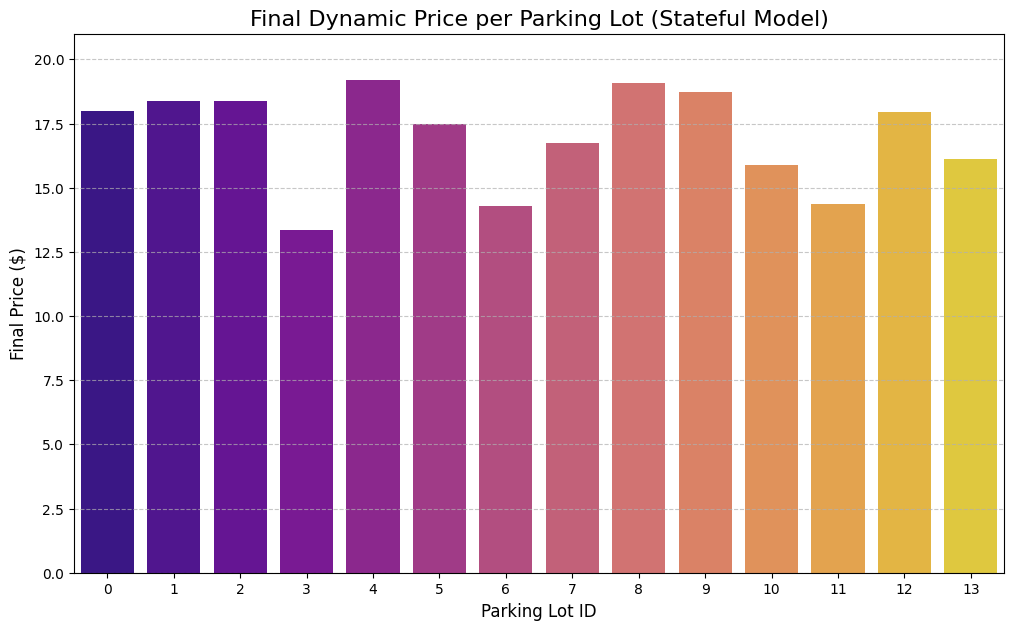

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# First, load the final data generated by your successful Pathway script
# This assumes the output file is named 'pathway_final_prices.csv'
try:
    results_df = pd.read_csv('pathway_final_prices.csv')
except FileNotFoundError:
    print("Error: 'pathway_final_prices.csv' not found. Please run the final script first.")
    # Creating a dummy DataFrame to allow the script to run for demonstration
    results_df = pd.DataFrame({
        'parking_lot_id': range(14),
        'final_price': [18.01, 18.40, 18.40, 13.37, 19.20, 17.47, 14.28, 16.75, 19.06, 18.72, 15.89, 14.37, 17.96, 16.11]
    })


# Now, create the bar chart to visualize the results
plt.figure(figsize=(12, 7))
sns.barplot(x='parking_lot_id', y='final_price', data=results_df, palette='plasma')

plt.title('Final Dynamic Price per Parking Lot (Stateful Model)', fontsize=16)
plt.xlabel('Parking Lot ID', fontsize=12)
plt.ylabel('Final Price ($)', fontsize=12)
plt.ylim(0, 21) # Set y-axis limit to be slightly above the max price
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()